## FAVOUR UGBODU'S TASK ONE

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## READING THE DATA

In [2]:
data=pd.read_csv("student_scores - student_scores.csv")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## EXPLORING THE DATA

In [4]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


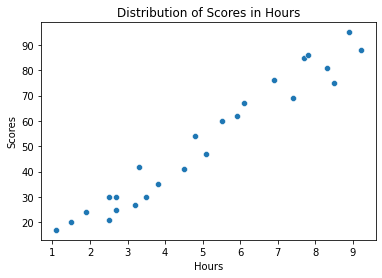

In [6]:
sns.scatterplot(x=data["Hours"], y=data["Scores"])
plt.title("Distribution of Scores in Hours")
plt.xlabel("Hours")
plt.ylabel("Scores");

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## PREPARE DATA

In [8]:
target="Scores"
X= data.drop(columns=target)
y=data[target]

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## GETTING THE INTERCEPTS AND COEFFICIENTS OF OUR MODEL

In [11]:
intercept= round(model.intercept_,2)
coef=round(model.coef_ [0], 2)
print(f"Model's intercept for the scores gotten by the students is {intercept}")
print(f"Model's coefficient for the number of hours spent reading by a student is {coef}")

Model's intercept for the scores gotten by the students is 2.83
Model's coefficient for the number of hours spent reading by a student is 9.68


## COMMUNICATING RESULTS

In [12]:
print(f"scores = ({coef} * Hours) + {intercept}")

scores = (9.68 * Hours) + 2.83


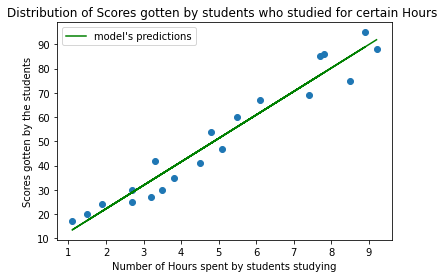

In [13]:
#plotting the regression line
plt.scatter(X_train.values, y_train)
plt.plot(X_train.values, model.predict(X_train), color="green", label= "model's predictions")
plt.xlabel("Number of Hours spent by students studying")
plt.ylabel("Scores gotten by the students")
plt.title("Distribution of Scores gotten by students who studied for certain Hours ")
plt.legend();

## MAKING PREDICTIONS

In [14]:
y_predictions= model.predict(X_test)
y_predictions

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [15]:
# creating a datafram of actual versus predicted scores
new_data= pd.DataFrame({"Actual":y_test, "Predicted":y_predictions}).reset_index(drop=True)

new_data

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## CALCULATING MODEL EFFICIENCY

In [16]:
MAE=round(mean_absolute_error(y_test,y_predictions),2)
print(f"Model's mean absolute error is {MAE}")

Model's mean absolute error is 3.92
